In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/Durga/Downloads/train-20211012T045720Z-001/train'
valid_path = 'C:/Users/Durga/Downloads/test/test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234553344/234545216 [==============================] - 38s 0us/step


In [5]:

# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('C:/Users/Durga/Downloads/train-20211012T045720Z-001/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)


In [9]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

Total params: 58,733,060
Trainable params: 401,412
Non-trainable params: 58,331,648
__________________________________________________________________________________________________


In [10]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/Durga/Downloads/train-20211012T045720Z-001/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:

test_set = test_datagen.flow_from_directory('C:/Users/Durga/Downloads/test/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [15]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 459s 8s/step - loss: 1.2749 - accuracy: 0.8344 - val_loss: 0.1683 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 436s 7s/step - loss: 0.4739 - accuracy: 0.9252 - val_loss: 1.0639 - val_accuracy: 0.8889
Epoch 3/20
61/61 [==============================] - 434s 7s/step - loss: 0.3665 - accuracy: 0.9452 - val_loss: 1.0446 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 398s 7s/step - loss: 0.4602 - accuracy: 0.9446 - val_loss: 0.9117 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 283s 5s/step - loss: 0.3295 - accuracy: 0.9610 - val_loss: 0.4005 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 279s 5s/step - loss: 0.3279 - accuracy: 0.9580 - val_loss: 6.4253e-04 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 303s 5s/step - loss: 0

In [16]:
import matplotlib.pyplot as plt

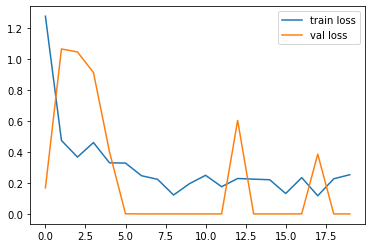

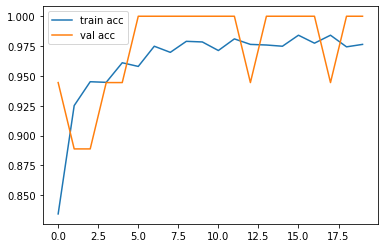

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [19]:
y_pred = model.predict(test_set)

In [20]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.7216789e-24, 1.0000000e+00, 1.3777078e-19, 7.5560076e-22],
       [1.8309086e-23, 0.0000000e+00, 1.0000000e+00, 8.2880399e-25],
       [0.0000000e+00, 1.0000000e+00, 3.2246673e-30, 1.4794336e-29],
       [2.6057802e-17, 3.2696145e-25, 3.4823712e-33, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.5776250e-17, 5.8708599e-10, 3.1693904e-27],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [3.6660218e-29, 8.6209512e-12, 4.7418905e-35, 1.0000000e+00],
       [6.3416625e-38, 1.2995097e-35, 2.6256140e-34, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [3.6587838e-22, 5.6638903e-24, 3.1048664e-19, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.3889021e-16, 6.0678952e-

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([2, 1, 2, 1, 3, 0, 0, 1, 3, 3, 1, 3, 1, 0, 2, 2, 3, 2], dtype=int64)

In [23]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_resnet50.h5')

In [31]:
img_data

array([[[[-0.9976009 , -0.9971088 , -0.99901575],
         [-0.99757016, -0.9971703 , -0.9988927 ],
         [-0.9973856 , -0.9971396 , -0.9987082 ],
         ...,
         [-0.9942484 , -0.99264896, -0.9965244 ],
         [-0.99421763, -0.99264896, -0.99661666],
         [-0.99421763, -0.99264896, -0.99661666]],

        [[-0.9974779 , -0.9970473 , -0.99895424],
         [-0.99729335, -0.99695504, -0.99873894],
         [-0.9972011 , -0.9969858 , -0.99858516],
         ...,
         [-0.99449444, -0.99280274, -0.99673975],
         [-0.99434066, -0.99258745, -0.99661666],
         [-0.9943714 , -0.9926182 , -0.9966474 ]],

        [[-0.99729335, -0.9969858 , -0.99886197],
         [-0.99723184, -0.99707806, -0.99886197],
         [-0.99707806, -0.9969858 , -0.99867743],
         ...,
         [-0.99449444, -0.99264896, -0.9967705 ],
         [-0.9945252 , -0.99258745, -0.9966782 ],
         [-0.99461746, -0.9926797 , -0.9967705 ]],

        ...,

        [[-0.9968935 , -0.99621683, -0

In [26]:
img=image.load_img('C:/Users/Durga/Downloads/test data comp files/dsd (632)_compressed.jpg',target_size=(224,224))

In [27]:

x=image.img_to_array(img)
x

array([[[ 78.,  94.,  32.],
        [ 79.,  92.,  36.],
        [ 85.,  93.,  42.],
        ...,
        [187., 239., 113.],
        [188., 239., 110.],
        [188., 239., 110.]],

       [[ 82.,  96.,  34.],
        [ 88.,  99.,  41.],
        [ 91.,  98.,  46.],
        ...,
        [179., 234., 106.],
        [184., 241., 110.],
        [183., 240., 109.]],

       [[ 88.,  98.,  37.],
        [ 90.,  95.,  37.],
        [ 95.,  98.,  43.],
        ...,
        [179., 239., 105.],
        [178., 241., 108.],
        [175., 238., 105.]],

       ...,

       [[101., 123.,  59.],
        [119., 138.,  74.],
        [130., 145.,  80.],
        ...,
        [129., 221.,  34.],
        [126., 218.,  31.],
        [125., 217.,  30.]],

       [[107., 128.,  59.],
        [115., 133.,  71.],
        [127., 145.,  87.],
        ...,
        [122., 212.,  36.],
        [122., 214.,  29.],
        [123., 215.,  30.]],

       [[126., 141.,  76.],
        [135., 147.,  85.],
        [135., 1

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:

import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [32]:

model.predict(img_data)

array([[1.0567544e-02, 9.8113982e-05, 9.8878419e-01, 5.5009540e-04]],
      dtype=float32)

In [33]:
a=np.argmax(model.predict(img_data), axis=1)

In [35]:
a==2

array([ True])